# Testing out SymPy dsolve

In [1]:
%matplotlib inline
from sympy import init_printing
init_printing(use_latex='mathjax')

import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
from sympy.plotting import plot
from scipy.integrate import cumtrapz
from sympy import sin,cos,Eq

## Problem
A ship should have:
* heading ($\psi$) varying as a sinus
* constant global X motion 
* no drift angle

how does the global Y motion look like to achieve this?

In [2]:
t,X_dot,C1 = sp.symbols('t \dot{X} C1')
Y,psi = sp.symbols('Y psi',cls = sp.Function)

In [3]:
psi = sp.pi/4*sin(t)
psi

π⋅sin(t)
────────
   4    

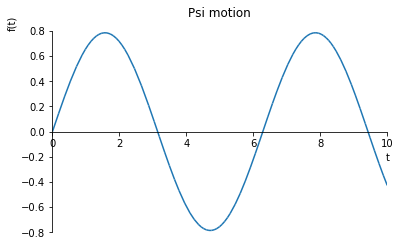

In [4]:
plot(psi,(t,0,10),title='Psi motion');

Local transverse velocity $v$ expressed in global coordinates:

In [5]:
v = -X_dot*sin(psi) + Y(t).diff(t)*cos(psi)
v

             ⎛π⋅sin(t)⎞      ⎛π⋅sin(t)⎞ d       
- \dot{X}⋅sin⎜────────⎟ + cos⎜────────⎟⋅──(Y(t))
             ⎝   4    ⎠      ⎝   4    ⎠ dt      

This transverse velocity should always be zero (no drift angle), resulting the following ordinary differential equation:

In [6]:
v_equation = Eq(v,0)
v_equation

             ⎛π⋅sin(t)⎞      ⎛π⋅sin(t)⎞ d           
- \dot{X}⋅sin⎜────────⎟ + cos⎜────────⎟⋅──(Y(t)) = 0
             ⎝   4    ⎠      ⎝   4    ⎠ dt          

Use sympy to find the analytical solution to this equation:

In [7]:
Y_motion = sp.dsolve(eq = v_equation)
Y_motion

                    ⌠                 
                    ⎮    ⎛π⋅sin(t)⎞   
                    ⎮ sin⎜────────⎟   
                    ⎮    ⎝   4    ⎠   
Y(t) = C₁ + \dot{X}⋅⎮ ───────────── dt
                    ⎮    ⎛π⋅sin(t)⎞   
                    ⎮ cos⎜────────⎟   
                    ⎮    ⎝   4    ⎠   
                    ⌡                 

Set $C_1$ to 0 and $\dot{X}=1$ (1 m/s)

In [8]:
Y_motion_ = Y_motion.rhs.subs({C1:0,X_dot:1,psi:sin(t)})
Y_motion_

⌠                 
⎮    ⎛π⋅sin(t)⎞   
⎮ sin⎜────────⎟   
⎮    ⎝   4    ⎠   
⎮ ───────────── dt
⎮    ⎛π⋅sin(t)⎞   
⎮ cos⎜────────⎟   
⎮    ⎝   4    ⎠   
⌡                 

In [9]:
Y_motion_ = sp.simplify(Y_motion_)
Y_motion_

⌠                 
⎮    ⎛π⋅sin(t)⎞   
⎮ tan⎜────────⎟ dt
⎮    ⎝   4    ⎠   
⌡                 

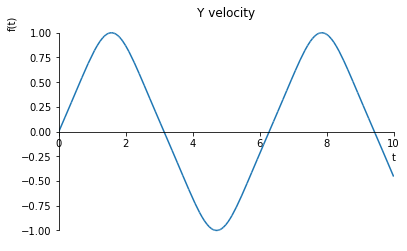

In [10]:
plot(Y_motion_.args[0],(t,0,10),title = 'Y velocity');

Calculate $v$ with this solution to verify that v is 0

In [11]:
v

             ⎛π⋅sin(t)⎞      ⎛π⋅sin(t)⎞ d       
- \dot{X}⋅sin⎜────────⎟ + cos⎜────────⎟⋅──(Y(t))
             ⎝   4    ⎠      ⎝   4    ⎠ dt      

In [12]:
v_ = v.subs({X_dot:1,Y(t).diff(t):Y_motion_.args[0]})
v_

     ⎛π⋅sin(t)⎞      ⎛π⋅sin(t)⎞    ⎛π⋅sin(t)⎞
- sin⎜────────⎟ + cos⎜────────⎟⋅tan⎜────────⎟
     ⎝   4    ⎠      ⎝   4    ⎠    ⎝   4    ⎠

In [13]:
sp.simplify(v_)

0

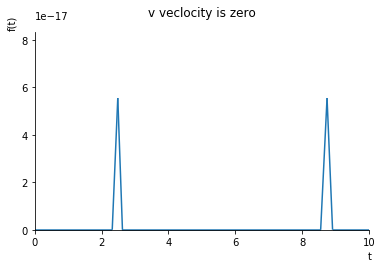

In [14]:
plot(v_,(t,0,10),title = 'v veclocity is zero');

Sympy seems to be unable to solve the integral for Y motion analytically. The integral is instead solved numerically

In [15]:
dY = sp.lambdify((t),Y_motion_.args[0])

t_ = np.linspace(0,10,100)
dYs = dY(t = t_)



Text(0.5,0,'t [s]')

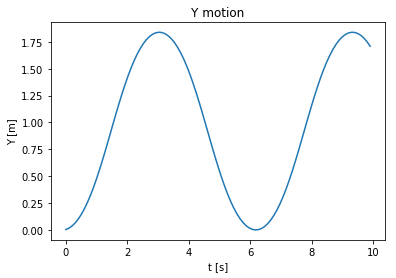

In [16]:
Ys = cumtrapz(dYs,t_)

fig,ax = plt.subplots()
ax.plot(t_[0:-1],Ys);
ax.set_title('Y motion')
ax.set_ylabel('Y [m]')
ax.set_xlabel('t [s]')